In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score

import random
import statistics
import time

import pickle

import warnings
warnings.filterwarnings("ignore")

np.random.seed(12345)

In [4]:
train_binary = pd.read_csv("train_binary.csv")
test_binary = pd.read_csv("test_binary.csv")

In [6]:
train_binary.head(3)

,order_id,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,2539329,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2398795,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,473747,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
test_binary.head(3)

,order_id,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1187899,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1492625,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1402502,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In order to use Logistic Regression for this task, we need to normalize the training data by averaging category values for users. From now on, for each customer each category will be represented by the value from 0 to 1 and indicate the fraction of how often that product is purchased (0 for never, 0.5 for every other time etc). 

As for the testing data, our targets, we cannot have 134 target variables for a single regression. For this reason we will train a separate model for each product category and use them to predict upcoming shopping basket.

In [9]:
y = test_binary.drop('order_id', axis = 1).set_index('user_id')

In [11]:
train_binary

,order_id,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,2539329,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2398795,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,473747,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2254736,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,431534,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139869,2558525,206209,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3139870,2266710,206209,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3139871,1854736,206209,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3139872,626363,206209,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train_binary = train_binary.drop('order_id', axis = 1).set_index('user_id')

In [20]:
X = train_binary.groupby(train_binary.index).mean()
X.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.100000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.100000
2,0.0,0.214286,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,...,0.142857,0.071429,0.071429,0.00,0.0,0.0,0.0,0.142857,0.0,0.642857
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.363636,0.090909,0.000000,0.00,0.0,0.0,0.0,0.090909,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.25,0.0,0.0,0.0,0.250000,0.0,0.000000
5,0.0,0.500000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.0,0.750000


In [21]:
X.shape

(206209, 134)

In [22]:
y.shape

(206209, 134)

# Logistic Regression

Now that we have our independent variables (X) and a series of targets (y), we need to split the data into train and test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [24]:
# instantiate the dictionary for storing 134 trained logistic regressions
logistic_categories = {}

# for keeping track of the process progress, instantiate a counter value (i) and number of models.
i = 1
number_of_models = X_train.columns.shape[0]

# time the duration of the process:
start = time.time()

# for each category:
for category in X_train.columns:
    # instantiate a seperate logistic regression model
    model = LogisticRegression()
    
    # fit the model on a respective target and save the model into the dictionary under a category name
    logistic_categories[category] = model.fit(X_train, y_train[category])
    
    # print progress
    print(f"Done with {i} of {number_of_models}")
    i += 1
    
end = time.time()
print(f"Run time: {end - start} seconds")

Done with 1 of 134
Done with 2 of 134
Done with 3 of 134
Done with 4 of 134
Done with 5 of 134
Done with 6 of 134
Done with 7 of 134
Done with 8 of 134
Done with 9 of 134
Done with 10 of 134
Done with 11 of 134
Done with 12 of 134
Done with 13 of 134
Done with 14 of 134
Done with 15 of 134
Done with 16 of 134
Done with 17 of 134
Done with 18 of 134
Done with 19 of 134
Done with 20 of 134
Done with 21 of 134
Done with 22 of 134
Done with 23 of 134
Done with 24 of 134
Done with 25 of 134
Done with 26 of 134
Done with 27 of 134
Done with 28 of 134
Done with 29 of 134
Done with 30 of 134
Done with 31 of 134
Done with 32 of 134
Done with 33 of 134
Done with 34 of 134
Done with 35 of 134
Done with 36 of 134
Done with 37 of 134
Done with 38 of 134
Done with 39 of 134
Done with 40 of 134
Done with 41 of 134
Done with 42 of 134
Done with 43 of 134
Done with 44 of 134
Done with 45 of 134
Done with 46 of 134
Done with 47 of 134
Done with 48 of 134
Done with 49 of 134
Done with 50 of 134
Done with

In [28]:
logistic_categories.keys()

dict_keys(['air fresheners candles', 'asian foods', 'baby accessories', 'baby bath body care', 'baby food formula', 'bakery desserts', 'baking ingredients', 'baking supplies decor', 'beauty', 'beers coolers', 'body lotions soap', 'bread', 'breakfast bakery', 'breakfast bars pastries', 'bulk dried fruits vegetables', 'bulk grains rice dried goods', 'buns rolls', 'butter', 'candy chocolate', 'canned fruit applesauce', 'canned jarred vegetables', 'canned meals beans', 'canned meat seafood', 'cat food care', 'cereal', 'chips pretzels', 'cleaning products', 'cocoa drink mixes', 'coffee', 'cold flu allergy', 'condiments', 'cookies cakes', 'crackers', 'cream', 'deodorants', 'diapers wipes', 'digestion', 'dish detergents', 'dog food care', 'doughs gelatins bake mixes', 'dry pasta', 'eggs', 'energy granola bars', 'energy sports drinks', 'eye ear care', 'facial care', 'feminine care', 'first aid', 'food storage', 'fresh dips tapenades', 'fresh fruits', 'fresh herbs', 'fresh pasta', 'fresh vegeta

Now we have a dictionary with 134 separate logistic regressions that we will use to predict the upcoming shopping list. Let's check accuracies of our base models (unoptimized) on train and test sets.

In [31]:
# instantiate empty lists to store train and test accuracies:
train_scores = []
test_scores = []

# for each logistic regression:
for category in logistic_categories.keys():
    
    # append train score to the corresponding list
    train_scores.append(logistic_categories[category].score(X_train, y_train[category]))
    # append test score to the corresponding list
    test_scores.append(logistic_categories[category].score(X_test, y_test[category]))

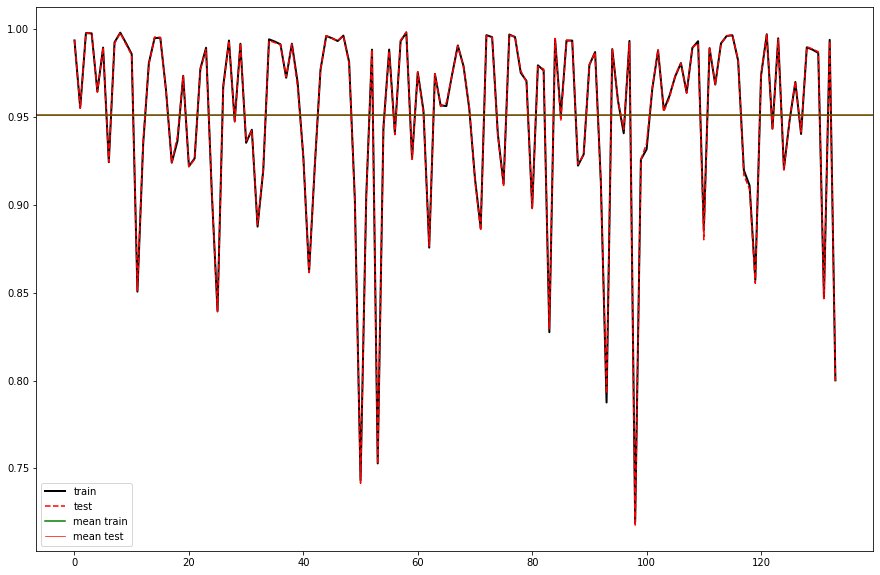

Average train accuracy: 0.95%
Average test accuracy: 0.95%


In [39]:
plt.figure(figsize = (15,10))

plt.plot(range(134), train_scores, color = 'black', label = 'train', linewidth = 2)
plt.plot(range(134), test_scores, color = 'red', label = 'test', linestyle = 'dashed')
plt.axhline(statistics.mean(train_scores), label = 'mean train', color = 'green')
plt.axhline(statistics.mean(test_scores), label = 'mean test', color = 'red', linewidth = 0.7)
plt.legend()
plt.show()

print(f"Average train accuracy: {np.round(statistics.mean(train_scores),2)}")
print(f"Average test accuracy: {np.round(statistics.mean(test_scores),2)}")

It appears that models are highly overfit but lets go ahead and test them anyways

In [40]:
# define a function that sorts the dictionary based on key values:
def sort_dict(dictionary):
    return {key: value for key, value in sorted(dictionary.items(), key = lambda item: item[1], reverse = True)}


In [41]:
# define a function that produces a dictionary with each model's predictions
def logreg_basket_proba1(test_set):
    
    categories_prob = {}
    
    for category in logistic_categories.keys():
        prob = logistic_categories[category].predict_proba(test_set.values)[:,1]
        categories_prob[category] = prob
        
    return categories_prob

In [58]:
df_prob = pd.DataFrame(logreg_basket_proba1(X_test), index = X_test.index)
df_prob.head(10)

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
135112,0.002515,0.032215,0.001092,0.001237,0.013500,0.004340,0.119628,0.006437,0.001293,0.004419,...,0.162115,0.221928,0.020517,0.030609,0.005678,0.006694,0.019112,0.181122,0.001835,0.098663
22275,0.002703,0.028479,0.001068,0.001546,0.015891,0.005200,0.041057,0.002984,0.000981,0.000944,...,0.038171,0.020419,0.182742,0.028051,0.003904,0.003998,0.007464,0.059505,0.000690,0.145432
80993,0.003859,0.054804,0.000354,0.002013,0.018600,0.006263,0.121186,0.015728,0.001694,0.002392,...,0.065261,0.027118,0.007934,0.141293,0.009097,0.011129,0.004717,0.082210,0.003921,0.287169
102810,0.002678,0.026806,0.001339,0.001298,0.015874,0.006665,0.145876,0.004410,0.001286,0.001492,...,0.175558,0.020305,0.015515,0.031070,0.002854,0.005547,0.017950,0.065680,0.000772,0.283958
149559,0.002315,0.022988,0.000896,0.001365,0.012157,0.006010,0.044686,0.004376,0.000912,0.001980,...,0.034520,0.036941,0.011528,0.022017,0.004342,0.006178,0.005878,0.063994,0.001369,0.240799
95372,0.003214,0.030659,0.000871,0.001446,0.016047,0.009115,0.091105,0.005837,0.001049,0.001463,...,0.050431,0.032291,0.020795,0.034258,0.005962,0.004504,0.013020,0.065242,0.001293,0.222926
115817,0.003449,0.025716,0.000335,0.000678,0.008630,0.006235,0.029662,0.008058,0.002012,0.649176,...,0.027096,0.029623,0.004239,0.022927,0.009021,0.009969,0.003035,0.076175,0.661918,0.042457
123034,0.001646,0.039498,0.002179,0.001019,0.025840,0.003430,0.156055,0.003443,0.001011,0.001630,...,0.229349,0.034252,0.029291,0.053474,0.005567,0.003429,0.004892,0.067016,0.000440,0.163528
67569,0.004951,0.043912,0.000653,0.001185,0.009593,0.003021,0.062329,0.006229,0.006895,0.003313,...,0.176500,0.020631,0.056670,0.031667,0.003762,0.017680,0.011465,0.060356,0.001816,0.072367


Above we have a table with predicted probabilities for each category to be in the next basket. In order to decide whether to use the category for predicted basket we have to define a threshold for the probability. If the probability for a given category equals or higher than a threshold, this category will is predicted to be in the next basket. 

In [59]:
# get the data frame where all values that are equal or greater than 0.39 is 1, and 0 otherwise.
df_prob_binary = np.where(df_prob >=0.39,1,0)
df_prob_binary = pd.DataFrame(df_prob_binary, columns = df_prob.columns, index = X_test.index)
df_prob_binary.head(10)

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
135112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115817,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
123034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
print(f"Jaccard Score: {jaccard_score(y_test, df_prob_binary, average = 'samples')}")
print(f"f1-score: {f1_score(y_test, df_prob_binary, average = 'samples')}")


Jaccard Score: 0.28218060370224696
f1-score: 0.3967712237253569


Previously, the best model, top_N, had a Jaccard coefficient and F1-score of .304 and .438, respectively. So current model with a threshold of 0.39 failed to outperform the baseline model. However, let's investigate how Jaccard coefficient and F1-score are affected by changes in probability threshold:

In [62]:
thresholds = np.arange(0.1, 0.9, 0.01)
jacc_scores = []
f1_scores = []

df_probabilities = pd.DataFrame(logreg_basket_proba1(X_test), index = X_test.index)

for threshold in thresholds:
    
    df_binary = np.where(df_probabilities >=threshold,1,0)
    df_binary = pd.DataFrame(df_binary, columns = df_probabilities.columns, index = X_test.index)
    
    jacc_scores.append(jaccard_score(y_test, df_binary, average = 'samples'))
    f1_scores.append(f1_score(y_test, df_binary, average = 'samples'))

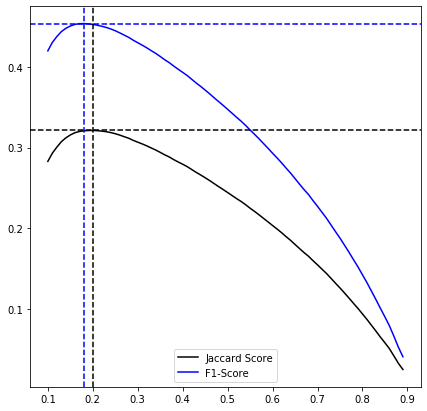

Jaccard Score is maxed at 0.321 with a threshold of 0.2
F1 Score is maxed at 0.453 with a threshold of 0.18


In [165]:
plt.figure(figsize = (7,7))

plt.plot(thresholds, jacc_scores, color = 'black', label = 'Jaccard Score')
plt.plot(thresholds, f1_scores, color = 'blue', label = 'F1-Score')
plt.axhline(np.max(jacc_scores), color = 'black', linestyle = 'dashed')
plt.axhline(np.max(f1_scores), color = 'blue', linestyle = 'dashed')
plt.axvline(x = thresholds[np.argmax(jacc_scores)], color = 'black', linestyle = 'dashed')
plt.axvline(x = thresholds[np.argmax(f1_scores)], color = 'blue', linestyle = 'dashed')

plt.legend()

plt.show()

print(f"Jaccard Score is maxed at {np.round(np.max(jacc_scores),3)} with a threshold of {np.round(thresholds[np.argmax(jacc_scores)],3)}")
print(f"F1 Score is maxed at {np.round(np.max(f1_scores),3)} with a threshold of {np.round(thresholds[np.argmax(f1_scores)],3)}")


As shown on a graph above, accuracy metrics are maximized on a range of thresholds of 0.18 and 0.2. A probability of 0.2 for the category to be included in the next shopping list, considering how we normalized the data, means that the category will be purchased at least once out of 5 visits. Potentially, this might indicate some cyclical patterns, for the users in this data set. Meaning, if we assume that there is no variation in shopping patterns across all customers (no compulsive purchases etc), each customer's shopping cycle is repeated every 5 trips, on average. I will investigate this hypothesis in a future work. 

# Hyperparameter Optimization using GridSearch

In [74]:
from tempfile import mkdtemp


# To build a pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In this section we will attempt to optimize each one of 134 Logistic Regressions using `GridSearch()`. This method will search through all possible combinations of parameters (that we will provide in a grid) and fit each model individually using best parameters for a given model. Meaning, we will automatically optimize all 134 models. 

_Note:_ 
- Due to a very long run time of the search, we will start off with a smaller range of C-values for L1 and L2 penalties.
- There is no need to include different types of scalers, since we have already normalized the data. 
- We have tested using PCA() in order to reduce number of variables used for prediction. We were able to reduce number of variables to 111, however, during the PCA nature, we lose any capacity of interpretability of the coefficients.

In [78]:
# Set up a directory to cache pipeline results to
cachedir = mkdtemp()

# Set up a pipeline
my_pipeline = Pipeline([('model', LogisticRegression())], memory=cachedir)

In [79]:
c_values = [0.1, 1, 10]
# Parameter grid
logreg_param_grid = [
    
    # l1 without PCA
    { #  have to manually set the solver for l1 penalty. otherwise will raise an error of trying to use l2 penalty
      # with incompatible solver (default = 'lbfgs')
     'model': [LogisticRegression(solver = 'saga', penalty='l1', random_state=3)],
     'model__C': c_values},
    
    # l2 (default) without PCA
    {
     'model': [LogisticRegression(solver='lbfgs', penalty = 'l2', random_state=3)],
     'model__C': c_values},
    
]

In [80]:
# instantiate a dictionary to store all trained models
logistic_categories_grid = {}

i = 1
number_of_models = X_train.columns.shape[0]

start = time.time()
for category in X_train.columns:
    # in order to find the best set of parameters for each model we have to instantiate the search inside the loop
    logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, verbose=3, n_jobs = -1)
    logistic_categories_grid[category] = logreg_gs.fit(X_train, y_train[category])
    print(f"Done with {i} of {number_of_models}")
    i += 1
    
end = time.time()
print(f"Run time: {end - start} seconds")

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.1min remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 1 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   40.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   43.6s finished


Done with 2 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.3min remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


Done with 3 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.2min remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 4 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   46.4s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   50.2s finished


Done with 5 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   50.5s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


Done with 6 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   36.0s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.8s finished


Done with 7 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   54.9s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 8 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.3min remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


Done with 9 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.1min remaining:   10.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 10 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.1min remaining:   10.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 11 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   32.4s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.6s finished


Done with 12 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   38.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.4s finished


Done with 13 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   52.5s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.9s finished


Done with 14 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 15 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 16 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   37.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.4s finished


Done with 17 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   33.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.3s finished


Done with 18 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   36.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.5s finished


Done with 19 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   40.7s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   43.8s finished


Done with 20 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   35.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.2s finished


Done with 21 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   36.1s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.9s finished


Done with 22 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   42.5s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   50.2s finished


Done with 23 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.1min remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 24 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   34.1s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.8s finished


Done with 25 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   32.6s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.5s finished


Done with 26 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   31.7s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.1s finished


Done with 27 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 28 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   31.5s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.8s finished


Done with 29 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   53.7s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 30 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   36.9s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.2s finished


Done with 31 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   31.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.8s finished


Done with 32 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   35.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.6s finished


Done with 33 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   35.1s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.9s finished


Done with 34 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   52.7s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 35 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   58.8s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 36 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 37 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   40.7s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   45.5s finished


Done with 38 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   58.0s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 39 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   40.3s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.5s finished


Done with 40 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   30.5s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   33.3s finished


Done with 41 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   35.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.2s finished


Done with 42 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   38.9s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.4s finished


Done with 43 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   46.2s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   47.5s finished


Done with 44 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.1min remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 45 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.1min remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 46 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   53.9s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 47 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 48 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   50.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   55.1s finished


Done with 49 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   36.5s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.7s finished


Done with 50 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   33.3s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.8s finished


Done with 51 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   37.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.2s finished


Done with 52 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   48.4s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


Done with 53 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   38.4s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.5s finished


Done with 54 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   39.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   45.1s finished


Done with 55 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 56 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   34.9s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.5s finished


Done with 57 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   54.4s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


Done with 58 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 59 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   38.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.8s finished


Done with 60 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   57.1s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 61 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   37.9s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.9s finished


Done with 62 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   34.6s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.8s finished


Done with 63 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   48.1s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   51.9s finished


Done with 64 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   38.5s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.4s finished


Done with 65 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   39.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   43.2s finished


Done with 66 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   56.5s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 67 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   51.5s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 68 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   46.5s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   53.4s finished


Done with 69 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   37.2s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.5s finished


Done with 70 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   37.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.7s finished


Done with 71 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   34.7s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.9s finished


Done with 72 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 73 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 74 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   35.8s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.3s finished


Done with 75 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   36.2s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.8s finished


Done with 76 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.1min remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 77 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 78 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   48.8s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   56.7s finished


Done with 79 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   34.0s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.5s finished


Done with 80 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   30.6s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   33.0s finished


Done with 81 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   49.8s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.8s finished


Done with 82 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.1min remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 83 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   35.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.6s finished


Done with 84 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   51.6s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 85 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   37.6s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.8s finished


Done with 86 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   52.5s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 87 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 88 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   37.1s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.7s finished


Done with 89 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   36.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.8s finished


Done with 90 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   38.0s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.3s finished


Done with 91 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   49.0s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   56.9s finished


Done with 92 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   35.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.7s finished


Done with 93 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   34.2s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.0s finished


Done with 94 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 95 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   49.1s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   54.7s finished


Done with 96 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   42.7s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   45.0s finished


Done with 97 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   50.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


Done with 98 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   33.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.7s finished


Done with 99 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   35.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.0s finished


Done with 100 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   39.3s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.2s finished


Done with 101 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   38.3s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.6s finished


Done with 102 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   48.6s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   56.3s finished


Done with 103 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   44.2s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   46.0s finished


Done with 104 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   52.0s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.7s finished


Done with 105 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   45.0s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.0s finished


Done with 106 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   56.5s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 107 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   39.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   40.3s finished


Done with 108 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   55.9s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 109 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 110 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   38.0s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.0s finished


Done with 111 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   56.9s remaining:    8.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 112 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   40.6s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   44.0s finished


Done with 113 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   59.6s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 114 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.1min remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 115 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.1min remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 116 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 117 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   34.2s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.4s finished


Done with 118 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   34.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.4s finished


Done with 119 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   33.0s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.0s finished


Done with 120 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   47.1s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   52.0s finished


Done with 121 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 122 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   37.3s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.2s finished


Done with 123 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


Done with 124 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   40.9s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.1s finished


Done with 125 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   41.7s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   43.7s finished


Done with 126 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 127 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   36.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   39.4s finished


Done with 128 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 129 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   47.5s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   58.3s finished


Done with 130 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Done with 131 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   33.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.4s finished


Done with 132 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  1.0min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished


Done with 133 of 134
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:   38.2s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.0s finished


Done with 134 of 134
Run time: 7693.027506113052 seconds


In [81]:
pkl_filename = 'Grid_Logistics/grid_log_models_refactored.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(logistic_categories_grid, file)

In [ ]:
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)

In [93]:
best_estimators = []
best_scores = []

for key in list(logistic_categories_grid.keys()):
    best_estimators.append(logistic_categories_grid[key].best_estimator_[0])
    best_scores.append(logistic_categories_grid[key].best_score_)
    
grid_results = pd.DataFrame({'Category': list(logistic_categories_grid.keys()),
                             'Estimators': best_estimators,
                             'Scores': best_scores})

In [117]:
grid_results.sort_values(by = 'Scores', ascending = False)

,Category,Estimators,Scores
58,frozen juice,"LogisticRegression(C=0.1, class_weight=None, d...",0.998054
8,beauty,"LogisticRegression(C=1, class_weight=None, dua...",0.997994
2,baby accessories,"LogisticRegression(C=0.1, class_weight=None, d...",0.997763
3,baby bath body care,"LogisticRegression(C=0.1, class_weight=None, d...",0.997618
121,specialty wines champagnes,"LogisticRegression(C=0.1, class_weight=None, d...",0.997060
...,...,...,...
133,yogurt,"LogisticRegression(C=0.1, class_weight=None, d...",0.799639
93,packaged cheese,"LogisticRegression(C=0.1, class_weight=None, d...",0.787030
53,fresh vegetables,"LogisticRegression(C=0.1, class_weight=None, d...",0.752357
50,fresh fruits,"LogisticRegression(C=10, class_weight=None, du...",0.742761


The table above illustrates how each model was fit with different individual set of best parameters (from provided range)

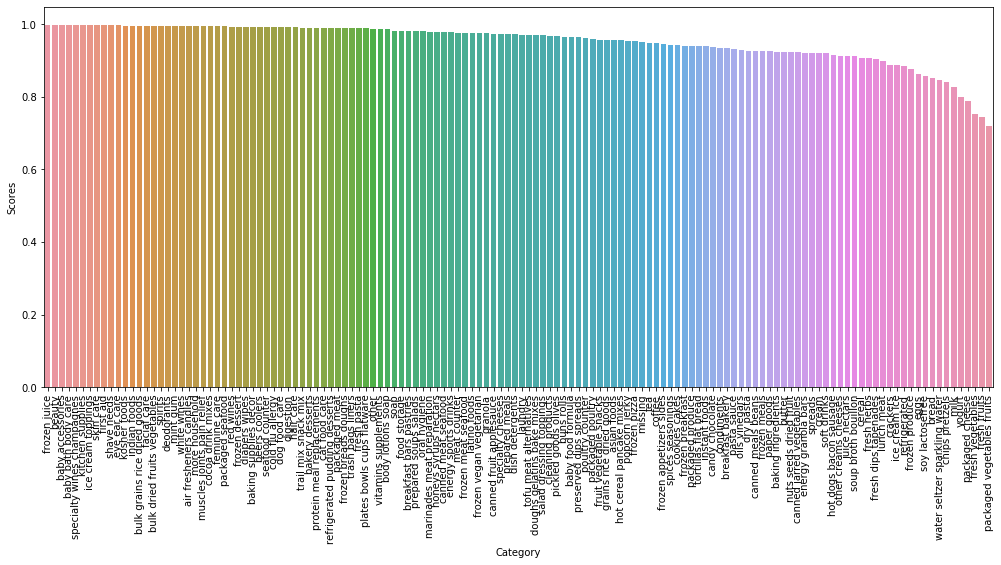

In [118]:
plt.figure(figsize = (17,7))

sns.barplot('Category', 'Scores', data = grid_results.sort_values(by = 'Scores', ascending = False))
plt.xticks(rotation = 'vertical')

plt.show()

Graph above illustrates the predictive power of each model in descending order.

In [119]:
grid_train_scores = []
grid_test_scores = []

for category in logistic_categories_grid.keys():
    grid_train_scores.append(logistic_categories_grid[category].score(X_train, y_train[category]))
    grid_test_scores.append(logistic_categories_grid[category].score(X_test, y_test[category]))
 

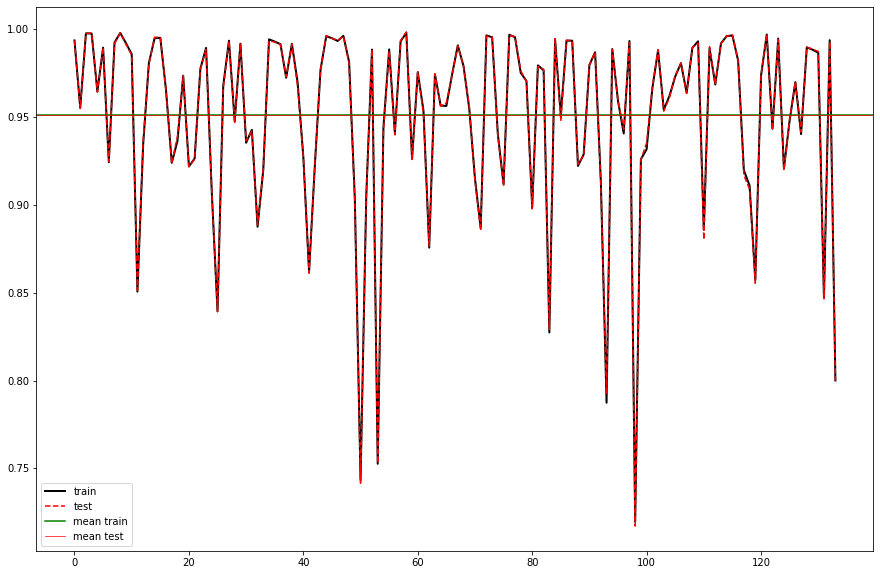

Average train accuracy: 0.95
Average test accuracy: 0.95


In [120]:
plt.figure(figsize = (15,10))

plt.plot(range(134), grid_train_scores, color = 'black', label = 'train', linewidth = 2)
plt.plot(range(134), grid_test_scores, color = 'red', label = 'test', linestyle = 'dashed')
plt.axhline(statistics.mean(grid_train_scores), label = 'mean train', color = 'green')
plt.axhline(statistics.mean(grid_test_scores), label = 'mean test', color = 'red', linewidth = 0.7)
plt.legend()
plt.show()

print(f"Average train accuracy: {np.round(statistics.mean(grid_train_scores),2)}")
print(f"Average test accuracy: {np.round(statistics.mean(grid_test_scores),2)}")

In [122]:
def logreg_basket_proba_grid(test_set):
    
    categories_prob_grid = {}
    
    for category in logistic_categories_grid.keys():
        prob = logistic_categories_grid[category].predict_proba(test_set.values)[:,1]
        categories_prob_grid[category] = prob
        
    return categories_prob_grid

In [123]:
thresholds_grid = np.arange(0.1, 0.9, 0.01)
jacc_scores_grid = []
f1_scores_grid = []

df_probabilities_grid = pd.DataFrame(logreg_basket_proba_grid(X_test), index = X_test.index)

for threshold in thresholds_grid:
    
    df_binary_grid = np.where(df_probabilities_grid >=threshold,1,0)
    df_binary_grid = pd.DataFrame(df_binary_grid, columns = df_probabilities_grid.columns, index = X_test.index)
    
    jacc_scores_grid.append(jaccard_score(y_test, df_binary_grid, average = 'samples'))
    f1_scores_grid.append(f1_score(y_test, df_binary_grid, average = 'samples'))

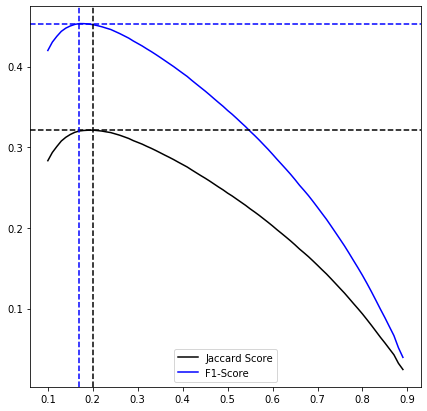

Jaccard Score is maxed at 0.321 with a threshold of 0.2
F1 Score is maxed at 0.453 with a threshold of 0.17


In [124]:
  
plt.figure(figsize = (7,7))

plt.plot(thresholds_grid, jacc_scores_grid, color = 'black', label = 'Jaccard Score')
plt.plot(thresholds_grid, f1_scores_grid, color = 'blue', label = 'F1-Score')
plt.axhline(np.max(jacc_scores_grid), color = 'black', linestyle = 'dashed')
plt.axhline(np.max(f1_scores_grid), color = 'blue', linestyle = 'dashed')
plt.axvline(thresholds_grid[np.argmax(jacc_scores_grid)], color = 'black', linestyle = 'dashed')
plt.axvline(thresholds_grid[np.argmax(f1_scores_grid)], color = 'blue', linestyle = 'dashed')

plt.legend()

plt.show()

print(f"Jaccard Score is maxed at {np.round(np.max(jacc_scores_grid),3)} with a threshold of {np.round(thresholds_grid[np.argmax(jacc_scores_grid)],3)}")
print(f"F1 Score is maxed at {np.round(np.max(f1_scores_grid),3)} with a threshold of {np.round(thresholds_grid[np.argmax(f1_scores_grid)],3)}")

As we can see from above, even after optimizing each model separately we were not able to improve any of the accuracy scores. The maximum capability of Series of Logistic Regressions is to achieve a Jaccard coefficient and F1-score of 0.321 and 0.453, respectively. We were unable to outperform the method suggested by Mathias Kraus and Stefan Feuerriegel, but we could outperform all baseline models.

### Third attempt 

Testing for a wider range of parameters. Illustrative purpose.

In [168]:
# Set up a directory to cache the pipeline results
cachedir3 = mkdtemp()

# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline3 = Pipeline([('model', LogisticRegression())], memory=cachedir3)

In [169]:
c_values = [10**n for n in range(-4,4)]
#c_values = [0.1, 1, 10]
# Parameter grid
logreg_param_grid3 = [
    
    # l1 without PCA
    {
     'model': [LogisticRegression(solver = 'saga', penalty='l1', random_state=3)],
     'model__C': c_values},
    
    # l2 (default) without PCA
    {
     'model': [LogisticRegression(solver='lbfgs', penalty = 'l2', random_state=3)],
     'model__C': c_values},
    
]

In [170]:
logistic_categories_grid3 = {}

i = 1
number_of_models = X_train.columns.shape[0]

start = time.time()
for category in X_train.columns:
    logreg_gs3 = GridSearchCV(my_pipeline3, param_grid=logreg_param_grid3, cv=5, verbose=3, n_jobs = -1)
    logistic_categories_grid3[category] = logreg_gs3.fit(X_train, y_train[category])
    print(f"Done with {i} of {number_of_models}")
    i += 1
    
end = time.time()
print(f"Run time: {end - start} seconds")

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.7min finished


Done with 1 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


Done with 2 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.4min finished


Done with 3 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.5min finished


Done with 4 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.9min finished


Done with 5 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 6 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 7 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 8 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.6min finished


Done with 9 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 10 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 11 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 12 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Done with 13 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


Done with 14 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 15 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 16 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Done with 17 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Done with 18 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 19 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.8min finished


Done with 20 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 21 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Done with 22 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.7min finished


Done with 23 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 24 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 25 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 26 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 27 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 28 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 29 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 30 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 31 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 32 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 33 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 34 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 35 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 36 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 37 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


Done with 38 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 39 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


Done with 40 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Done with 41 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 42 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 43 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


Done with 44 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 45 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 46 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 47 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 48 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


Done with 49 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 50 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


Done with 51 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 52 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.1min finished


Done with 53 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 54 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


Done with 55 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 56 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Done with 57 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 58 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 59 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 60 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.1min finished


Done with 61 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 62 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 63 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


Done with 64 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


Done with 65 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


Done with 66 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 67 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 68 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.7min finished


Done with 69 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Done with 70 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 71 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 72 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 73 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 74 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 75 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 76 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.4min finished


Done with 77 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 78 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


Done with 79 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 80 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 81 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


Done with 82 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 83 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 84 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.1min finished


Done with 85 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Done with 86 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 87 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 88 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 89 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Done with 90 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


Done with 91 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.1min finished


Done with 92 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 93 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 94 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 95 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


Done with 96 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.7min finished


Done with 97 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.1min finished


Done with 98 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


Done with 99 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 100 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 101 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


Done with 102 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.1min finished


Done with 103 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.7min finished


Done with 104 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


Done with 105 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.8min finished


Done with 106 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 107 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Done with 108 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 109 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 110 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 111 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 112 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


Done with 113 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 114 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 115 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 116 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 117 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 118 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 119 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 120 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.8min finished


Done with 121 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 122 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 123 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 124 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 125 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


Done with 126 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 127 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 128 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 129 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


Done with 130 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.2min finished


Done with 131 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


Done with 132 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


Done with 133 of 134
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


Done with 134 of 134
Run time: 14941.33538198471 seconds


In [171]:
pkl_filename3 = 'Grid_Logistics/grid_log_models_refactored3.pkl'
with open(pkl_filename3, 'wb') as file:
    pickle.dump(logistic_categories_grid3, file)
    
    

In [173]:
    
best_estimators3 = []
best_scores3 = []

for key in list(logistic_categories_grid3.keys()):
    best_estimators3.append(logistic_categories_grid3[key].best_estimator_[0])
    best_scores3.append(logistic_categories_grid3[key].best_score_)
    
grid_results3 = pd.DataFrame({'Category': list(logistic_categories_grid3.keys()),
                             'Estimators': best_estimators3,
                             'Scores': best_scores3})

In [189]:
grid_results3.head(3)

,Category,Estimators,Scores
0,air fresheners candles,"LogisticRegression(C=0.1, class_weight=None, d...",0.993653
1,asian foods,"LogisticRegression(C=0.01, class_weight=None, ...",0.955658
2,baby accessories,"LogisticRegression(C=0.0001, class_weight=None...",0.997769


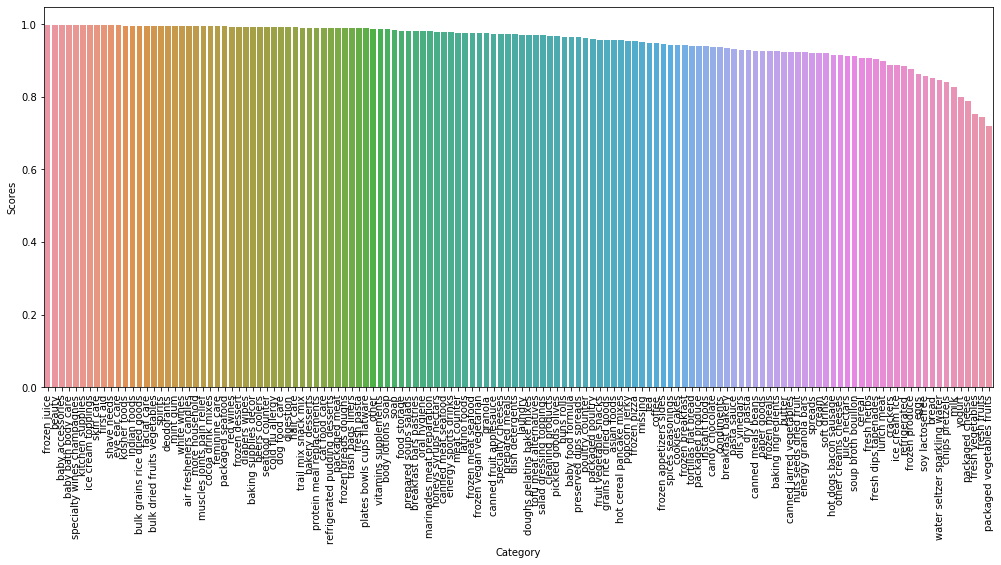

In [174]:
plt.figure(figsize = (17,7))

sns.barplot('Category', 'Scores', data = grid_results3.sort_values(by = 'Scores', ascending = False))
plt.xticks(rotation = 'vertical')

plt.show()

In [175]:
grid_train_scores3 = []
grid_test_scores3 = []

for category in logistic_categories_grid3.keys():
    grid_train_scores3.append(logistic_categories_grid3[category].score(X_train, y_train[category]))
    grid_test_scores3.append(logistic_categories_grid3[category].score(X_test, y_test[category]))
 

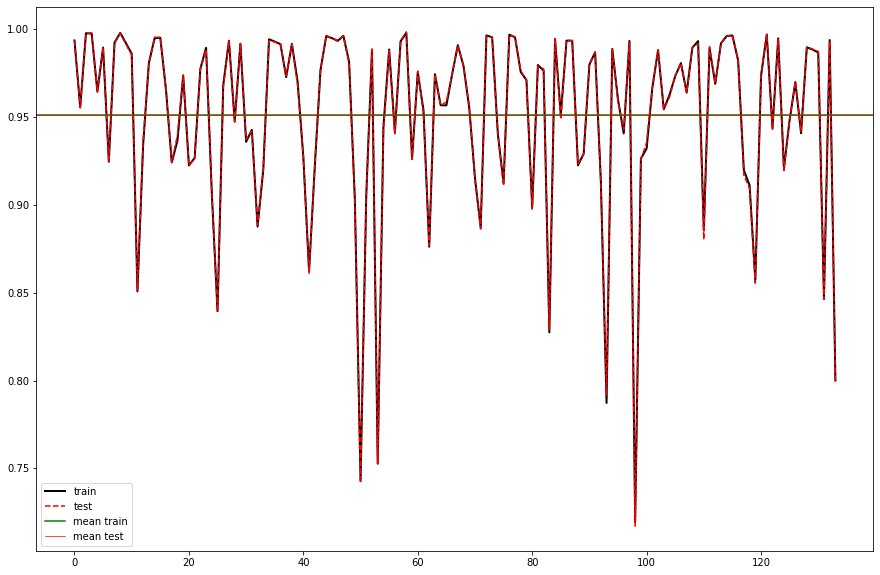

Average train accuracy: 0.95
Average test accuracy: 0.95


In [176]:
plt.figure(figsize = (15,10))

plt.plot(range(134), grid_train_scores3, color = 'black', label = 'train', linewidth = 2)
plt.plot(range(134), grid_test_scores3, color = 'red', label = 'test', linestyle = 'dashed')
plt.axhline(statistics.mean(grid_train_scores3), label = 'mean train', color = 'green')
plt.axhline(statistics.mean(grid_test_scores3), label = 'mean test', color = 'red', linewidth = 0.7)
plt.legend()
plt.show()

print(f"Average train accuracy: {np.round(statistics.mean(grid_train_scores3),2)}")
print(f"Average test accuracy: {np.round(statistics.mean(grid_test_scores3),2)}")

In [177]:
def logreg_basket_proba_grid3(test_set):
    
    categories_prob_grid3 = {}
    
    for category in logistic_categories_grid3.keys():
        prob = logistic_categories_grid3[category].predict_proba(test_set.values)[:,1]
        categories_prob_grid3[category] = prob
        
    return categories_prob_grid3

In [178]:
thresholds_grid3 = np.arange(0.1, 0.9, 0.01)
jacc_scores_grid3 = []
f1_scores_grid3 = []

df_probabilities_grid3 = pd.DataFrame(logreg_basket_proba_grid3(X_test), index = X_test.index)

for threshold in thresholds_grid3:
    
    df_binary_grid3 = np.where(df_probabilities_grid3 >=threshold,1,0)
    df_binary_grid3 = pd.DataFrame(df_binary_grid3, columns = df_probabilities_grid3.columns, index = X_test.index)
    
    jacc_scores_grid3.append(jaccard_score(y_test, df_binary_grid3, average = 'samples'))
    f1_scores_grid3.append(f1_score(y_test, df_binary_grid3, average = 'samples'))
    
 

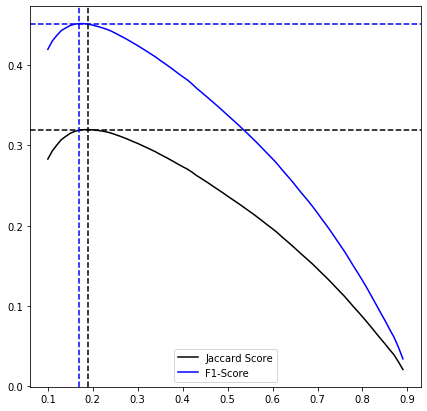

Jaccard Score is maxed at 0.32 with a threshold of 0.19
F1 Score is maxed at 0.451 with a threshold of 0.17


In [179]:
  
plt.figure(figsize = (7,7))

plt.plot(thresholds_grid3, jacc_scores_grid3, color = 'black', label = 'Jaccard Score')
plt.plot(thresholds_grid3, f1_scores_grid3, color = 'blue', label = 'F1-Score')
plt.axhline(np.max(jacc_scores_grid3), color = 'black', linestyle = 'dashed')
plt.axhline(np.max(f1_scores_grid3), color = 'blue', linestyle = 'dashed')
plt.axvline(thresholds_grid3[np.argmax(jacc_scores_grid3)], color = 'black', linestyle = 'dashed')
plt.axvline(thresholds_grid3[np.argmax(f1_scores_grid3)], color = 'blue', linestyle = 'dashed')

plt.legend()

plt.show()

print(f"Jaccard Score is maxed at {np.round(np.max(jacc_scores_grid3),3)} with a threshold of {np.round(thresholds_grid3[np.argmax(jacc_scores_grid3)],3)}")
print(f"F1 Score is maxed at {np.round(np.max(f1_scores_grid3),3)} with a threshold of {np.round(thresholds_grid3[np.argmax(f1_scores_grid3)],3)}")

In [194]:
# store dataframes for future use:
X.to_csv("X.csv")

y.to_csv("y.csv")

In [2]:
%load_ext watermark

%watermark -v -m -p numpy,pandas,sklearn -g

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
pandas 1.0.1
sklearn 0.22.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.5.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   :
